In [1]:
import sys
sys.path.append('./helpers')
import loadmat as lm
import glob
import os
from collections import Counter
import numpy as np
import seaborn as sn
import pandas as pd

In [5]:
files = glob.glob('F:/NP_DATA/*.mat')

In [9]:
fn = os.path.basename(files[1])
animal=fn.split('_')[0]
date = fn.split('_')[1]

pp=dict();
validNames = [];
for cntr in range(len(files)):
    current_file = files[cntr]
    fn = os.path.basename(current_file)
    animal=fn.split('_')[0]
    date = fn.split('_')[1]
    if animal in pp:
        datelist = pp[animal]
        
        if date in datelist:
            None
        else:
            pp[animal].append(date)
            validNames.append(current_file)
    else:
        pp[animal]=[];
        pp[animal].append(date)
        validNames.append(current_file)

In [8]:
len(files)

350

In [23]:
li = pp['AA1']
'190726' in li

True

In [32]:
validNames

['F:/NP_DATA\\AA1_190726_gain_1.mat',
 'F:/NP_DATA\\AA1_190727_contrast_1.mat',
 'F:/NP_DATA\\AA1_190728_gaincontrast10_1.mat',
 'F:/NP_DATA\\AA1_190729_gain_1.mat',
 'F:/NP_DATA\\AA1_190730_gaincontrast10_1.mat',
 'F:/NP_DATA\\AA2_190807_gain_1.mat',
 'F:/NP_DATA\\AA2_190808_gaincontrast10_1.mat',
 'F:/NP_DATA\\AA2_190809_gaincontrast10_2.mat',
 'F:/NP_DATA\\AA2_190810_contrast_1.mat',
 'F:/NP_DATA\\AA2_190811_dark_1.mat',
 'F:/NP_DATA\\AA2_190812_gain_1.mat',
 'F:/NP_DATA\\AA3_190801_gain_3.mat',
 'F:/NP_DATA\\AA3_190802_contrast_1.mat',
 'F:/NP_DATA\\AA3_190804_gain_1.mat',
 'F:/NP_DATA\\AA3_190805_gaincontrast10_1.mat',
 'F:/NP_DATA\\AA44_190924_gaincontrast10_1.mat',
 'F:/NP_DATA\\AA44_190925_gain_1.mat',
 'F:/NP_DATA\\AA44_190926_gain_1.mat',
 'F:/NP_DATA\\AA44_190927_gaincontrast10_1.mat',
 'F:/NP_DATA\\AA45_190924_gain_1.mat',
 'F:/NP_DATA\\AA45_190925_gaincontrast10_1.mat',
 'F:/NP_DATA\\AA46_190917_gain_1.mat',
 'F:/NP_DATA\\AA46_190918_gaincontrast10_1.mat',
 'F:/NP_DATA\\AA

In [11]:
anatomy = dataset['anatomy']
anatomy

{'tip_distance': array([ 669.58043374,  899.66717932, 1025.0720537 , 1074.99302846,
        1215.1644718 , 1248.01314892, 1313.83143427, 1318.87699042,
        1333.67394909, 1358.04422203, 1364.38377241, 1385.37104494,
        1393.49579818, 1386.7032491 , 1414.52090361, 1429.13831361,
        1435.71126677, 1453.52356083, 1434.70959617, 1444.91795984,
        1454.04869443, 1451.32730919, 1460.53567081, 1461.35483441,
        1467.20298158, 1491.28451187, 1493.24409557, 1520.        ,
        1511.54740416, 1537.35498861, 1514.65747211, 1532.47107394,
        1547.63940525, 1560.03755404, 1575.842082  , 1559.60876022,
        1583.96307859, 1584.32866241, 1610.78874972, 1614.44810212,
        2697.66625181, 1602.85823897, 1607.21862905, 1633.14763387,
        1631.57750561, 1626.82835722, 1659.82123344, 1650.50825158,
        1679.62440108, 1683.94560089, 1689.54026464, 1698.08874575,
        1693.17554053, 1687.70173628, 1699.77610672, 1703.42628373,
        1712.9620291 , 1725.0424

In [10]:
region_numbers = Counter()
raw_numbers = []
distance = [];
parent_winner = [];

for iF in validNames:
    try:
        dataset = lm.loadmat(iF)
        #print(iF)
        if 'anatomy' in dataset:
            anatomy = dataset['anatomy']
        else:
            continue

        if 'parent_shifted' in anatomy:
            parent = anatomy['parent_shifted']
        else:
            parent = anatomy['cluster_parent']
        
        idx = dataset['sp']['cgs']==2
        dd=anatomy['tip_distance'][idx]
        
        
        raw_numbers.append((np.sum(idx),np.ptp(dd)))
        parent = parent[idx]
        parent = [pa if len(pa) else 'Null' for pa in parent]
        
        region_numbers.update(parent)
        parent_winner.append(Counter(parent).most_common(1)[0][0])
    except:
        print(iF)
        
    

C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in reduce
  umr_maximum(a, axis, None, out, keepdims),
C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in reduce
  umr_minimum(a, axis, None, None, keepdims),


F:/NP_DATA\AA1_190728_gaincontrast10_1.mat


In [11]:
parent_winner

['VISp',
 'VISp',
 'VISp',
 'VISp',
 'SCm',
 'SCm',
 'VISp',
 'VISp',
 'SCm',
 'SCm',
 'RHP',
 'VISp',
 'VISp',
 'VISp',
 'LGd',
 'CA',
 'RSPv',
 'RSPv',
 'VISp',
 'MBmot',
 'LAT',
 'VISa',
 'RSPv',
 'RSPv',
 'RHP',
 'MG',
 'LGd',
 'BS',
 'RSPd',
 'PRT',
 'VISp',
 'hc',
 'VISp',
 'VISp',
 'VISp',
 'hc',
 'VISpm',
 'VISpm',
 'SSp-bfd',
 'RSPv',
 'RSPv',
 'RSPagl',
 'PRT',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'ECT',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'ECT',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'ECT',
 'MEC',
 'ECT',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 'MEC',
 '

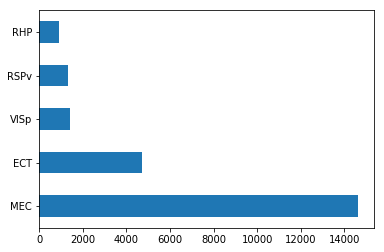

In [12]:
ff=pd.Series(region_numbers.elements())

ff.value_counts()[:5].plot('barh')

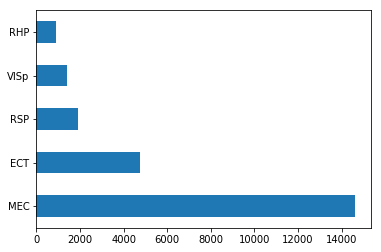

In [20]:
gg=region_numbers.elements()
gg=['RSP' if el.startswith('RS') else el for el in gg]
ff=pd.Series(gg)
ax=ff.value_counts()[:5].plot('barh')
fig = ax.get_figure()
fig.savefig(r'C:\temp\region_hist.pdf')

In [31]:
idx = 0
for ii in gg:
    if ii=='RSP':
        idx = idx+1
idx

1917

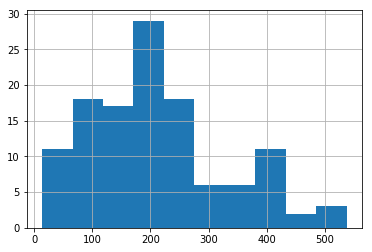

In [17]:
n_units = [x[0] for x in raw_numbers]
ff=pd.Series(n_units)
ff.hist()

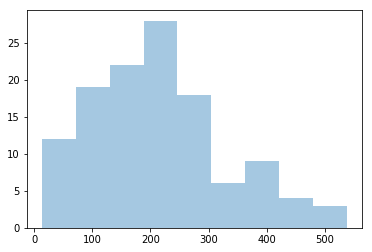

In [20]:
sn.distplot(n_units,kde=False)

C:\Users\attialex\AppData\Local\Continuum\anaconda3\envs\panda3d\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


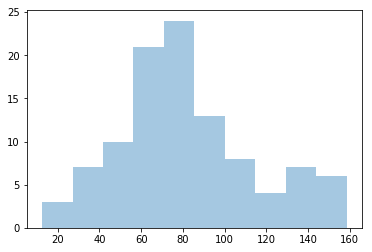

In [35]:
n_norm = [x[0]/x[1]*1000 for x in raw_numbers]
n_norm=np.array(n_norm)
n_norm=n_norm[np.logical_not(np.isnan(n_norm))]
ax = sn.distplot(n_norm,kde=False)
fig = ax.get_figure()
fig.savefig(r'C:\temp\units_mm.pdf')

In [17]:
gg=['RSP' if el.startswith('RS') else el for el in parent_winner]
gg=['VISp' if el.startswith('LGd') else el for el in gg]
gg=['VISp' if el.startswith('VIS') or el.startswith('SS') else el for el in gg]
gg=['MEC' if el.startswith('ECT') else el for el in gg]
data=[[x[0][0], x[0][1], x[1]] for x in zip(raw_numbers,gg)]
data[3]

[186, 2670.663394158115, 'VISp']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


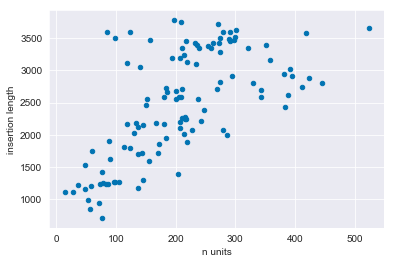

In [138]:

df=pd.DataFrame(data,columns=['n units', 'insertion length','parent'])
df.plot.scatter(x='n units',y='insertion length')


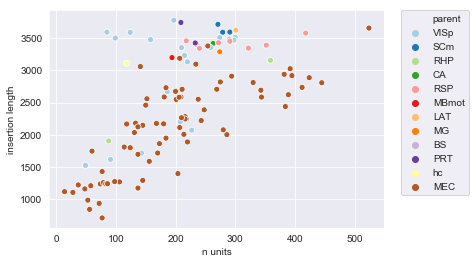

In [147]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sn.set_style("darkgrid")
#sn.set_style("whitegrid")
ax=sn.scatterplot(x="n units", y="insertion length", hue="parent",data=df,palette = sn.color_palette("Paired",12))#palette=sn.diverging_palette(312, 33, l=60, n=13, center="light"))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig(r'C:\temp\scatter_units.pdf',bbox_inches="tight")
#sn.despine()